# Importing libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Reading the dataset

In [2]:
df=pd.read_csv(r'heart.csv')

In [3]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Dataset structure

In [4]:
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 303
Number of columns: 14


### General information about the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Check for duplicated entries

In [6]:
df.duplicated().sum()

1

In [7]:
duplicates = df[df.duplicated(keep = False)]
duplicates

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [8]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [9]:
## Reset the index

df.reset_index(inplace = True, drop = True)
df.iloc[162: 165]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0


In [10]:
df.isnull().count()

age         302
sex         302
cp          302
trtbps      302
chol        302
fbs         302
restecg     302
thalachh    302
exng        302
oldpeak     302
slp         302
caa         302
thall       302
output      302
dtype: int64

In [11]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [12]:
df.describe()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trtbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalachh'}>],
       [<AxesSubplot:title={'center':'exng'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slp'}>,
        <AxesSubplot:title={'center':'caa'}>],
       [<AxesSubplot:title={'center':'thall'}>,
        <AxesSubplot:title={'center':'output'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

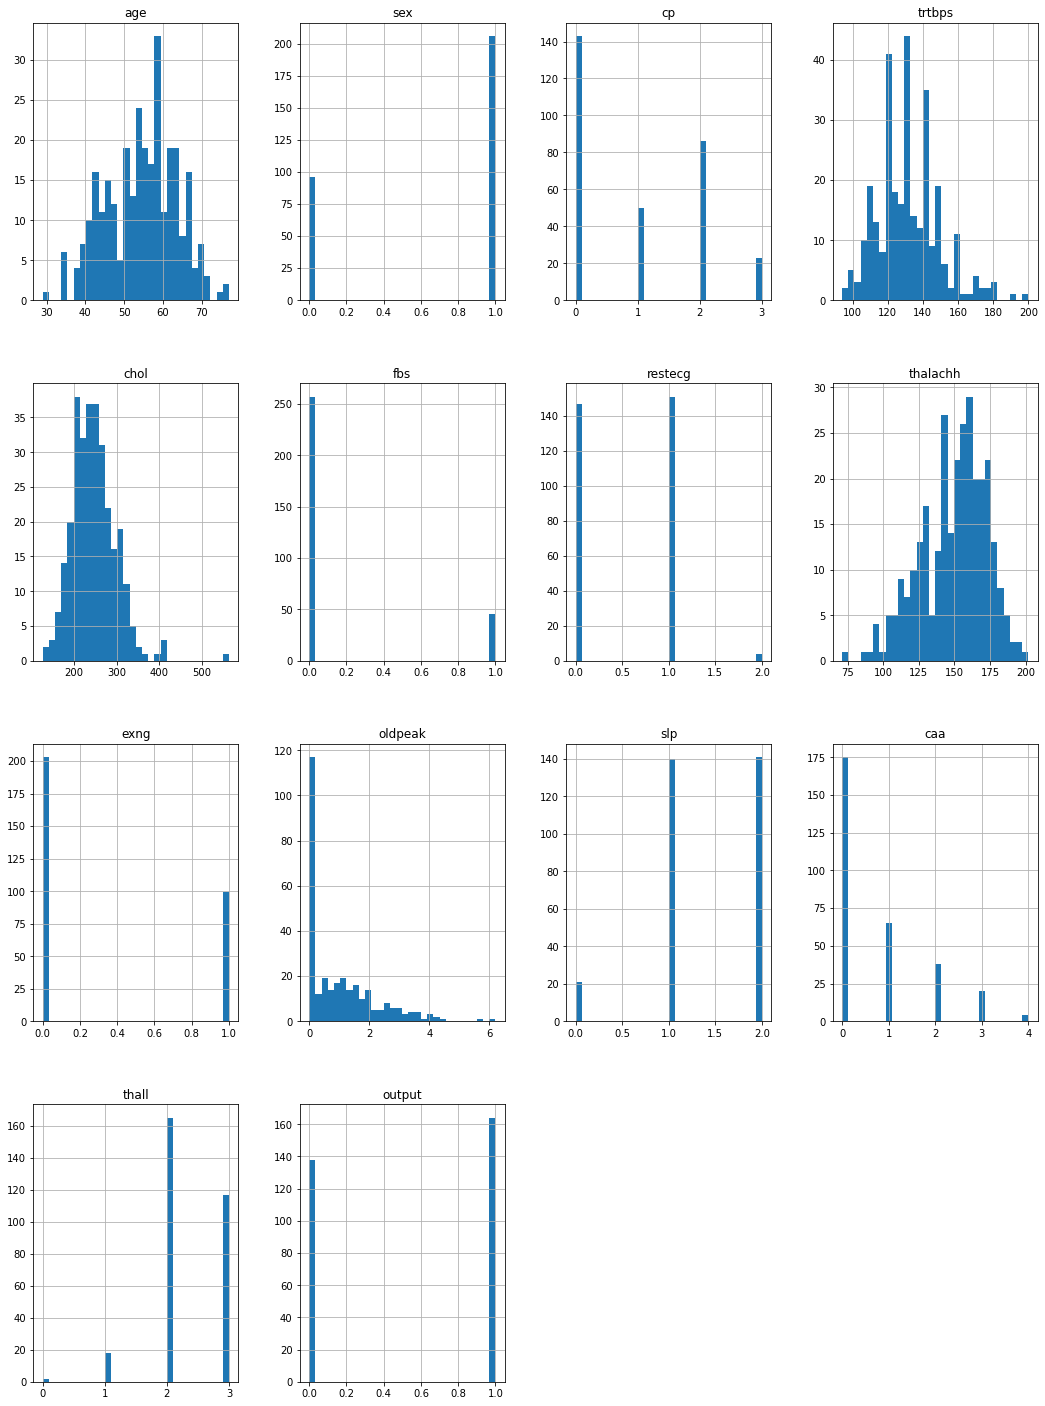

In [13]:
df.hist(bins = 30, figsize = (18, 25))

# Data analysis

In [14]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

## Train Test Split

In [16]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [17]:
print(xtrain)

[[-1.15360966 -1.46486632  1.005911   ... -0.64583368  0.28003436
  -0.51399432]
 [ 0.39626693  0.68265615 -0.93520799 ...  0.97951442 -0.71491124
   1.11996657]
 [ 0.39626693 -1.46486632 -0.93520799 ... -0.64583368  1.27497996
  -2.1479552 ]
 ...
 [-2.81419172  0.68265615  0.0353515  ...  0.97951442 -0.71491124
  -0.51399432]
 [ 0.39626693  0.68265615 -0.93520799 ...  0.97951442  1.27497996
   1.11996657]
 [-0.04655495  0.68265615  1.005911   ...  0.97951442 -0.71491124
   1.11996657]]


In [18]:
print(ytrain)

[1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0
 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1
 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 0 1 1 0 1 1 0 0 1 1 0
 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0
 0 1 1 1 1 1 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1]


In [19]:
print(xtest)

[[ 0.61767788  0.68265615 -0.93520799 ... -0.64583368  1.27497996
   1.11996657]
 [-0.04655495 -1.46486632  1.005911   ... -0.64583368 -0.71491124
  -0.51399432]
 [-1.81784249  0.68265615  1.005911   ...  0.97951442  3.26487116
  -0.51399432]
 ...
 [-0.37867136  0.68265615  1.97647049 ...  0.97951442  0.28003436
  -0.51399432]
 [-1.15360966  0.68265615 -0.93520799 ...  0.97951442  0.28003436
  -0.51399432]
 [ 1.06049976  0.68265615 -0.93520799 ... -0.64583368  0.28003436
   1.11996657]]


In [20]:
print(ytest)

[0 1 1 0 1 1 0 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 0 1 0 0 1 0 0 0 0
 1 0 0 0 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 0 1 0
 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1]


# Building models

# 1) Logistic regression

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
logreg = LogisticRegression(random_state = 0)
logreg.fit(xtrain,ytrain)

LogisticRegression(random_state=0)

In [22]:
logpred=logreg.predict(xtest)

In [23]:
# confusion matrix
cnf_matrix = confusion_matrix(ytest, logpred)
cnf_matrix

array([[30,  8],
       [ 9, 44]], dtype=int64)

In [24]:
lg=accuracy_score(ytest, logpred)
print("Accuracy:",lg)

Accuracy: 0.8131868131868132


In [25]:
#Using cross validation
from sklearn.model_selection import cross_val_score
logreg = LogisticRegression()
score=cross_val_score(logreg,x,y,cv=10)
cv_lg = score.mean()
cv_lg

0.8210752688172043

# 2) K nearest neighbour

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(xtest,ytest)

KNeighborsClassifier(n_neighbors=3)

In [27]:
pred_kn= knn.predict(xtest)

In [28]:
# confusion matrix
cnf_matrix = confusion_matrix(ytest, pred_kn)
cnf_matrix

array([[28, 10],
       [ 8, 45]], dtype=int64)

In [29]:
kn=accuracy_score(ytest, pred_kn)
print("Accuracy:",kn)

Accuracy: 0.8021978021978022


## Using Cross Validation

In [30]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,x,y,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

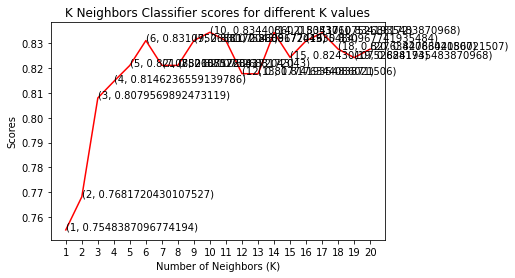

In [31]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [32]:
knn_classifier = KNeighborsClassifier(n_neighbors = 13)
score=cross_val_score(knn_classifier,x,y,cv=10)
cv_knn = score.mean()
cv_knn

0.8176344086021506

# 3)Descision tree

In [33]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [34]:
ypred_dt = dt.predict(xtest)

In [35]:
# confusion matrix
cnf_matrix = confusion_matrix(ytest, ypred_dt)
cnf_matrix

array([[30,  8],
       [18, 35]], dtype=int64)

In [36]:
dtc=accuracy_score(ytest, ypred_dt)
print("Accuracy:",dtc)

Accuracy: 0.7142857142857143


In [44]:
#Using Cross Validation
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
score=cross_val_score(dt,x,y,cv=10)
cv_dt = score.mean()
cv_dt

0.7746236559139785

# 4)Random forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=300)
rf.fit(xtrain, ytrain)

RandomForestClassifier(n_estimators=300)

In [46]:
pred_rf = rf.predict(xtest)

In [47]:
# confusion matrix
cnf_matrix = confusion_matrix(ytest, pred_rf)
cnf_matrix

array([[30,  8],
       [13, 40]], dtype=int64)

In [48]:
rfc=accuracy_score(ytest, pred_rf)
print("Accuracy:",rfc)

Accuracy: 0.7692307692307693


In [49]:
#Using Cross Validation
rf = RandomForestClassifier(n_estimators=10)
score=cross_val_score(rf,x,y,cv=10)
cv_rf = score.mean()
cv_rf

0.8180645161290322

# Conclusion

In [50]:
models = pd.DataFrame({
    'Model':['Logistic Regression', 'KNeighbours','Decision Tree', 'Random Forest'],
    'Accuracy_score' :[lg,kn,dtc,rfc]
})
models
models.sort_values(by='Accuracy_score', ascending=False)

,Model,Accuracy_score
0,Logistic Regression,0.813187
1,KNeighbours,0.802198
3,Random Forest,0.769231
2,Decision Tree,0.714286


## Using Cross Validation

In [51]:
models = pd.DataFrame({
    'Model':['Logistic Regression', 'KNeighbours','Decision Tree', 'Random Forest'],
    'Accuracy_score' :[cv_lg,cv_knn,cv_dt,cv_rf]
})
models
models.sort_values(by='Accuracy_score', ascending=False)

,Model,Accuracy_score
0,Logistic Regression,0.821075
3,Random Forest,0.818065
1,KNeighbours,0.817634
2,Decision Tree,0.774624


So from the above table we got that the most effective model for prediction is Logistic Regression